<a href="https://colab.research.google.com/github/Edu-Moreira/Edu-Moreira/blob/main/Dados_Investing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install investpy 
!pip install pandas

     |████████████████████████████████| 4.4 MB 8.1 MB/s 
     |████████████████████████████████| 235 kB 41.4 MB/s 
     |████████████████████████████████| 6.4 MB 31.4 MB/s 
     |████████████████████████████████| 503 kB 14.8 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=1bf2e99716822d8e098a0376716a2d8733749cab8597003531dc46d7b45b30a4
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import investpy as inv
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


In [3]:
#Obtendo e formatado a data mais atual
hoje = dt.date.today()
hoje = hoje.strftime('%d/%m/%Y')
print(hoje)

07/03/2022


In [4]:
#Obtendo a lista de Commodities disponíveis no Investing.com
commodity = inv.get_commodities_list()
commodity

['Gold',
 'Copper',
 'Silver',
 'Palladium',
 'Platinum',
 'Aluminum',
 'Zinc',
 'Lead',
 'Nickel',
 'Tin',
 'Copper',
 'Xetra-Gold',
 'MCX Aluminum Mini',
 'MCX Aluminum',
 'MCX Copper',
 'MCX Copper Mini',
 'MCX Gold 1 Kg',
 'MCX Gold Guinea',
 'MCX Gold Mini',
 'MCX Gold Petal',
 'MCX Gold Petal Del',
 'MCX Lead',
 'MCX Lead Mini',
 'MCX Nickel',
 'MCX Nickel Mini',
 'MCX Silver',
 'MCX Silver Micro',
 'MCX Silver Mini',
 'MCX Zinc',
 'MCX Zinc Mini',
 'US Coffee C',
 'US Cotton #2',
 'US Sugar #11',
 'Orange Juice',
 'US Cocoa',
 'London Coffee',
 'London Cocoa',
 'London Sugar',
 'Lumber',
 'MCX Cardamom',
 'MCX Cotton',
 'MCX Crude Palm Oil',
 'MCX Kapas',
 'MCX Mentha Oil',
 'MCX Castor Seed',
 'Live Cattle',
 'Lean Hogs',
 'Feeder Cattle',
 'Brent Oil',
 'Crude Oil WTI',
 'London Gas Oil',
 'Natural Gas',
 'Heating Oil',
 'Carbon Emissions',
 'Gasoline RBOB',
 'MCX Brent Oil',
 'MCX Crude Oil WTI',
 'MCX Natural Gas',
 'London Wheat',
 'Rough Rice',
 'US Soybean Oil',
 'US Soyb

Buscando dados completos de commodities para avaliação mais detalhada

In [55]:
#Definicao de Commodity e Janela Temporal a ser analisada

#Qual Commodity? escrever igual a lista apresentada
cm = input()

#Qual a Janela Temporal? escrever número em dias
jt = int(input()) 

Copper
900


In [56]:
df_cm = inv.get_commodity_historical_data(commodity= cm, from_date = '01/01/1950', to_date = hoje)
df_cm.tail()

/usr/local/lib/python3.7/dist-packages/investpy/commodities.py:648: Warning: Note that the displayed commodity data can differ depending on the country. If you want to retrieve copper data from either united states or united kingdom, specify the country parameter.
  warnings.warn(msg, Warning)


,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2022-03-02,4.5710,4.7050,4.5525,4.6655,79624,USD
2022-03-03,4.6710,4.7985,4.6615,4.7815,91703,USD
2022-03-04,4.7825,4.9490,4.7510,4.9375,97430,USD
2022-03-06,4.9270,5.0390,4.9117,5.0085,0,USD
2022-03-07,5.0085,5.0305,4.6745,4.7425,0,USD


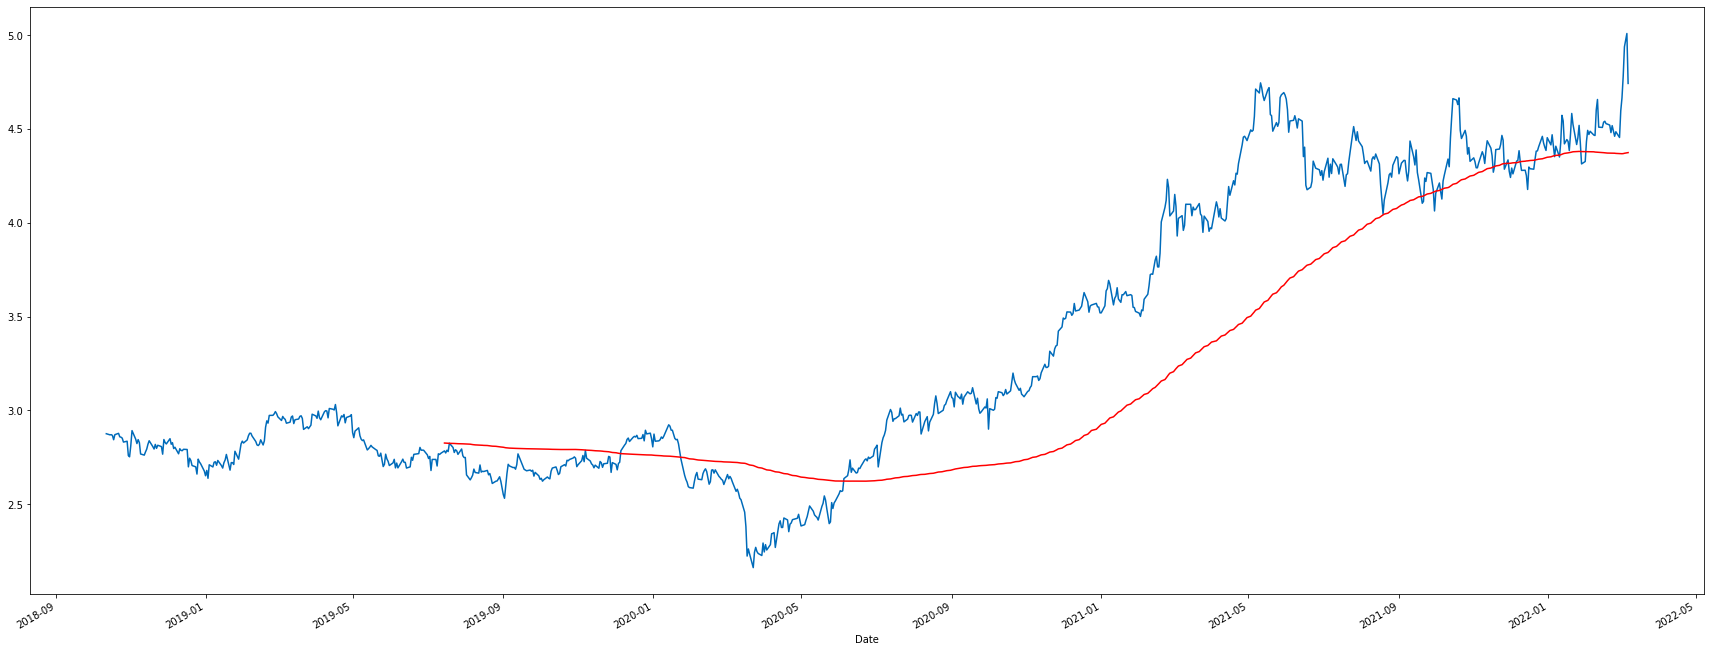

In [71]:
#plotando Fechamento com Média Móvel de 200 períodos
df_cm[-jt:]['Close'].plot(figsize = (30,12),color='#006bba')
df_cm[-jt:]['Close'].rolling(200).mean().plot(color = 'r')

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text major ticklabel objects>)

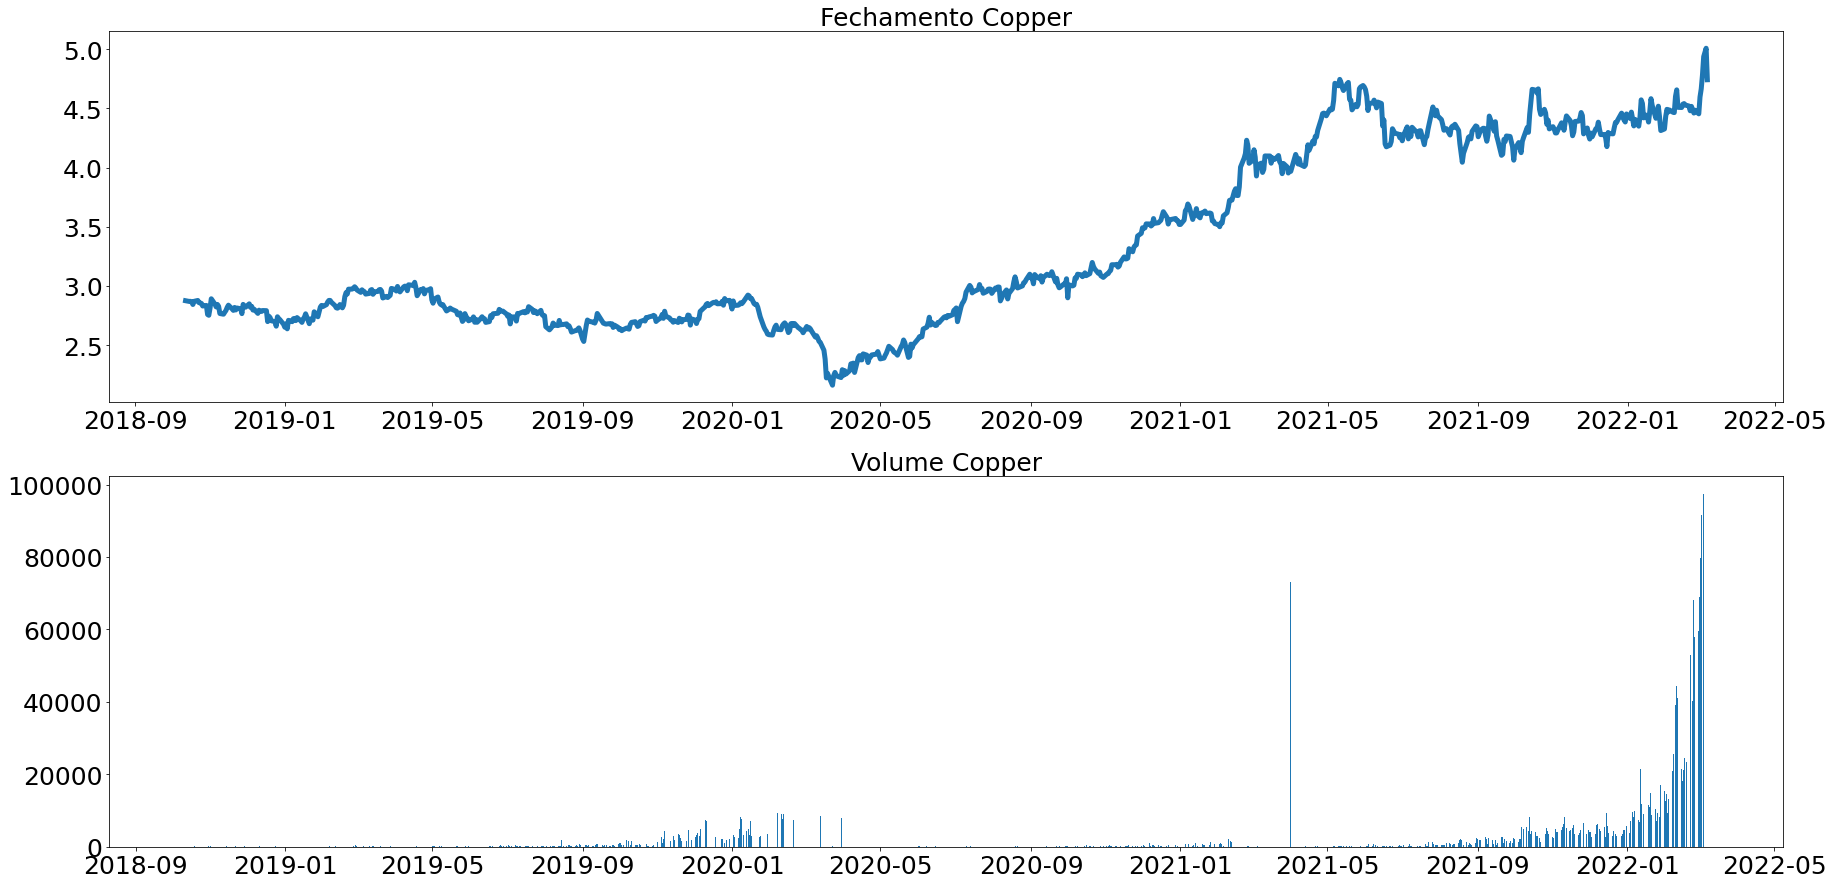

In [72]:
plt.figure(figsize=(30,15))  # create a plot figure

# create the first of two panels and set current axis
ax1 = plt.subplot(2, 1, 1) # (rows, columns, panel number)
ax1.set_title('Fechamento '+str(cm),fontsize=25)
plt.plot(df_cm[-jt:]['Close'],linewidth=5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# create the second panel and set current axis
ax2=plt.subplot(2, 1, 2)
ax2.set_title('Volume '+str(cm),fontsize=25)
plt.bar(df_cm[-jt:].index,df_cm[-jt:]['Volume']);
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


In [74]:
#Ver a valorização no periodo

df_cm_return = df_cm['Close'].tail(10) / df_cm['Close'].iloc[-jt]

df_cm_return

Date
2022-02-23    1.560675
2022-02-24    1.551113
2022-02-25    1.559458
2022-02-28    1.548853
2022-03-01    1.598227
2022-03-02    1.622218
2022-03-03    1.662552
2022-03-04    1.716794
2022-03-06    1.741481
2022-03-07    1.648992
Name: Close, dtype: float64

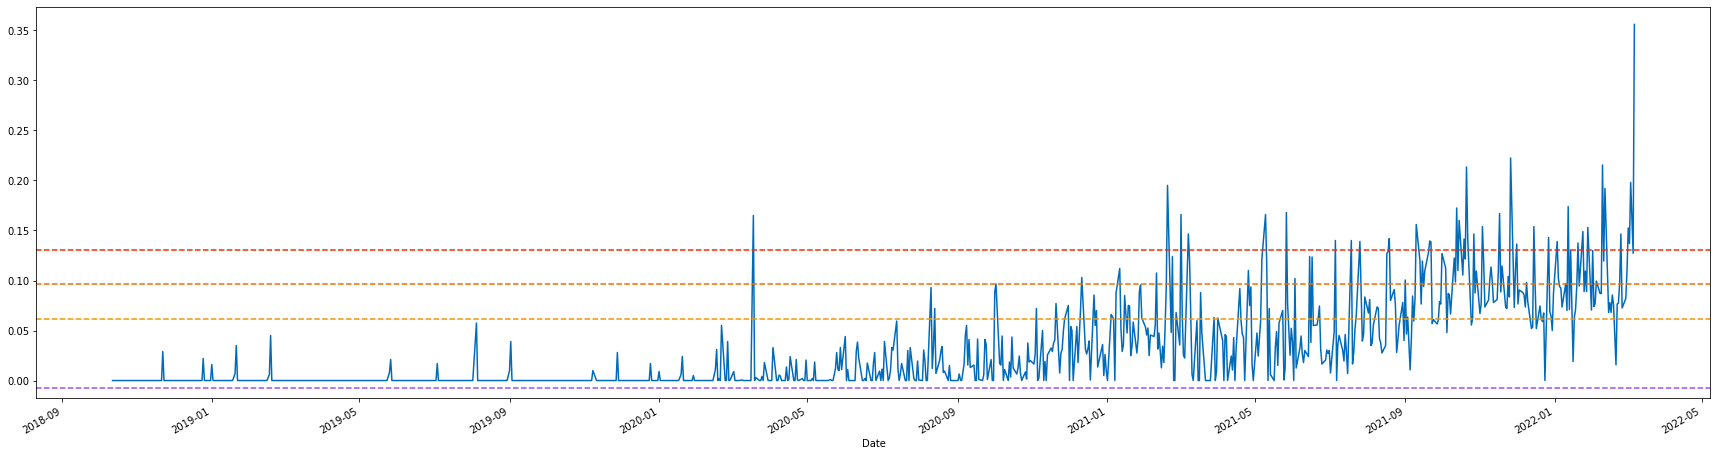

In [75]:
#Calculo da Volatilidade como a diferença entre máxima e mínima do dia
df_cm['Vol'] = df_cm['High']-df_cm['Low']

#Calculo das bandas de média + n*desvio-padrão
df_cmstd1 = df_cm['Vol'].mean()+df_cm['Vol'].std()
df_cmstd2= df_cm['Vol'].mean()+df_cm['Vol'].std()*2
df_cmstd3= df_cm['Vol'].mean()+df_cm['Vol'].std()*3

df_cmstd01 = df_cm['Vol'].mean()-df_cm['Vol'].std()
df_cmstd02= df_cm['Vol'].mean()-df_cm['Vol'].std()*2
df_cmstd03= df_cm['Vol'].mean()-df_cm['Vol'].std()*3

#plotando janela temporal
df_cm[-jt:]['Vol'].plot(figsize = (30,8),color='#006bba')

plt.axhline(df_cmstd01, color='#a54bfa', linestyle='dashed')
#plt.axhline(petrolstd02, color='#a54bfa', linestyle='dashed')
#plt.axhline(petrolstd03, color='#400d6f', linestyle='dashed')

plt.axhline(df_cmstd1, color='#f29400', linestyle='dashed')
plt.axhline(df_cmstd2, color='#f26c00', linestyle='dashed')
plt.axhline(df_cmstd3, color='#f22c00', linestyle='dashed')


In [62]:
df_cm[-jt:]['High'].max()

5.039

In [63]:
df_cm.index[(df_cm['High'] == df_cm[-jt:]['High'].max())]

DatetimeIndex(['2022-03-06'], dtype='datetime64[ns]', name='Date', freq=None)

In [64]:
df_cm[-jt:]['High'].min()

2.127

In [65]:
df_cm.index[(df_cm['High'] == df_cm[-jt:]['High'].min())]

DatetimeIndex(['2020-03-23'], dtype='datetime64[ns]', name='Date', freq=None)

Criando um painel com os dados de fechamento do grupo de commodities.

In [14]:
#Criando uma lista com as Commodities de interesse
lista_commodity = ['Brent Oil','Gold','Natural Gas']

In [15]:
painel = pd.DataFrame()
for i in lista_commodity:
  painel [i]= inv.get_commodity_historical_data(commodity= i, from_date = '01/01/1950', to_date = hoje)['High']

painel

,Brent Oil,Gold,Natural Gas
Date,,,
1988-06-27,15.10,443.7,NaN
1988-06-28,15.36,444.5,NaN
1988-06-29,15.47,435.0,NaN
1988-06-30,14.90,435.7,NaN
1988-07-01,14.60,437.2,NaN
...,...,...,...
2022-03-02,115.11,1951.4,4.911
2022-03-03,119.84,1944.6,4.936
2022-03-04,118.98,1974.9,5.045


Para verificar a tendência dos preços em um gráfico úinico fazemos a normalização dos dados. 

*caso se plote os preço "puros" a diferença de magnitude cria

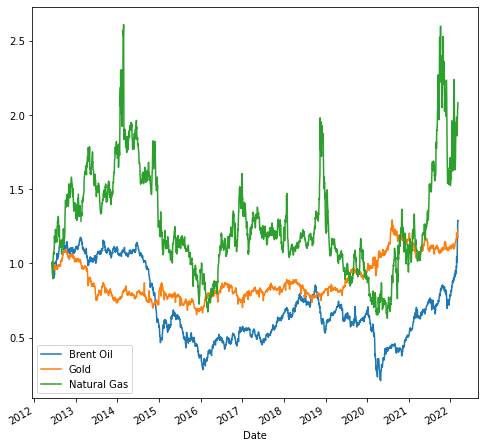

In [16]:
# Normalizando preços

normalizado = painel / painel.iloc[-jt]

normalizado[-jt:].plot(figsize = (8,8));